# Trabajo Practico 2

## Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
# Creamos una variable con la ruta
ruta_archivo = "servicio_meteorológico_no.csv"

# Cargamos los datos en el dataframe con el enconding utf8
df = pd.read_csv(ruta_archivo, encoding="mac_latin2")

# Mostramos las primeras filas y las ultimas para verificar
print(df.head(10))
print(df.tail(10))

         Estación                                     Valor Medio de   Ene  \
0  LA QUIACA OBS.                             Temperatura (grados C)  12.8   
1  LA QUIACA OBS.                      Temperatura máxima (grados C)  20.1   
2  LA QUIACA OBS.                      Temperatura mínima (grados C)   7.4   
3  LA QUIACA OBS.                               Humedad relativa (%)  65.3   
4  LA QUIACA OBS.                        Velocidad del Viento (km/h)   6.9   
5  LA QUIACA OBS.                          Nubosidad total (octavos)   5.2   
6  LA QUIACA OBS.                                 Precipitación (mm)  97.5   
7  LA QUIACA OBS.  Frecuencia de días con Precipitación superior ...  15.9   
8   TARTAGAL AERO                             Temperatura (grados C)  25.2   
9   TARTAGAL AERO                      Temperatura máxima (grados C)  31.7   

    Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0  12.5  12.4  10.9   6.9   4.4   4.1   6.7   9.3  11.7  12.8  13.2  
1

## Limpieza de datos

In [3]:
import numpy as np
# Creamos un diccionario con las palabras a reemplazar
reemplazos = {
    'mxima': 'máxima',
    'mnima': 'mínima',
    'Precipitacin': 'Precipitación',
    'das': 'días',
}
# Aca remplazamos las palabras con errores asignandole el diccionario creado
df.rename(columns={'Estacin': 'Estación'}, inplace=True)
# Aca este en particular no andaba con el replace.
df = df.replace(reemplazos, regex=True)
# Aca cambiamos los S/D que es sin datos a valor nulo
df.replace("S/D", np.nan, inplace=True)
# Primero podemos verificar el tema de los valores nulos
df = df.dropna() # PREGUNTAR HAY QUE BORRAR LOS NULOS? si hay que volarlos al choto pero hay que aclararlo despues el porque lo hicimos
# Tambien podemos verificar el tema de las filas duplicadas
df = df.drop_duplicates()
print(df.head(10))
print(df.tail(10))
# Convertimos en tipo float los datos que se encuentran como tipo string, para poder utilizarlos luego como valores numericos.
columnas = df.columns[2:14]
df[columnas] = df[columnas].astype(float)

          Estación                                     Valor Medio de   Ene  \
0   LA QUIACA OBS.                             Temperatura (grados C)  12.8   
1   LA QUIACA OBS.                      Temperatura máxima (grados C)  20.1   
2   LA QUIACA OBS.                      Temperatura mínima (grados C)   7.4   
3   LA QUIACA OBS.                               Humedad relativa (%)  65.3   
4   LA QUIACA OBS.                        Velocidad del Viento (km/h)   6.9   
5   LA QUIACA OBS.                          Nubosidad total (octavos)   5.2   
6   LA QUIACA OBS.                                 Precipitación (mm)  97.5   
7   LA QUIACA OBS.  Frecuencia de días con Precipitación superior ...  15.9   
9    TARTAGAL AERO                      Temperatura máxima (grados C)  31.7   
10   TARTAGAL AERO                      Temperatura mínima (grados C)  20.6   

     Feb   Mar   Abr   May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0   12.5  12.4  10.9   6.9   4.4   4.1   6.7   9.3  11.7  1

## Analisis descriptivo

In [4]:
def lista_elementos(df,inicio: int, fin: int)-> list([float]):
  """
  Funcion que toma como argumentos un dataframe, y el indice inicial y final de las columnas de las cuales queremos obtener los valores.
  Recorrera el dataframe fila a fila, cada fila sera un elemento (dentro de elementos) y tendra en formato lista los valores de las columnas correspondientes
  Finalmente nos devolvera la lista elementos, la cual posee las filas (filtradas por columnas)
  """
  elementos = []
  for index,row in df.iterrows():
    elementos.append(row.iloc[inicio:fin].tolist())
  return elementos

In [5]:
# Creamos las nuevas columnas para poder agregarlas al DataFrame.
df["Mean"]= np.nan
df["Mediana"] = np.nan
df["Desviacion Estandar"] = np.nan

In [6]:
# Agregamos los valores de la columna Mean
elementos_mean = lista_elementos(df,2,14)
promedios = [statistics.mean(lista) for lista in elementos_mean]
df['Mean'] = promedios

In [7]:
#Agregamos los valores de la columna Mediana
elementos_mediana = lista_elementos(df,2,14)
mediana = [statistics.median(lista) for lista in elementos_mediana]
df['Mediana'] = mediana

In [8]:
#Agregamos los valores de la columna Desviacion Estandar
elementos_DE = lista_elementos(df,2,14)
DE = [statistics.stdev(lista) for lista in elementos_DE]
df['Desviacion Estandar'] = DE

In [9]:
# Visualizamos nuestro dataframe para analizar que se hayan agregado correctamente las nuevas columnas.
df

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Mean,Mediana,Desviacion Estandar
0,LA QUIACA OBS.,Temperatura (grados C),12.8,12.5,12.4,10.9,6.9,4.4,4.1,6.7,9.3,11.7,12.8,13.2,9.808333,11.30,3.415861
1,LA QUIACA OBS.,Temperatura máxima (grados C),20.1,19.9,19.9,19.7,17.3,15.6,15.4,17.4,19.2,21.1,21.7,21.3,19.050000,19.80,2.138181
2,LA QUIACA OBS.,Temperatura mínima (grados C),7.4,7.0,6.3,2.8,-3.0,-6.2,-6.8,-4.2,-1.1,2.8,5.2,6.9,1.425000,2.80,5.409945
3,LA QUIACA OBS.,Humedad relativa (%),65.3,64.1,62.4,48.2,34.6,31.1,30.1,31.7,34.4,45.3,52.3,59.2,46.558333,46.75,13.910131
4,LA QUIACA OBS.,Velocidad del Viento (km/h),6.9,7.1,6.5,6.4,6.0,4.9,6.6,6.6,8.6,8.7,8.8,8.3,7.116667,6.75,1.227587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,BASE SAN MARTIN,Temperatura (grados C),2.0,0.9,-1.2,-3.3,-5.3,-9.3,-11.6,-11.5,-8.9,-5.9,-2.0,0.8,-4.608333,-4.30,4.883638
585,BASE SAN MARTIN,Temperatura máxima (grados C),4.5,3.3,1.3,-0.9,-2.3,-5.8,-7.3,-6.9,-4.6,-2.1,1.2,3.4,-1.350000,-1.50,4.157906
586,BASE SAN MARTIN,Temperatura mínima (grados C),-0.3,-1.3,-3.6,-5.8,-8.4,-13.5,-16.3,-16.8,-13.9,-10.2,-5.5,-1.8,-8.116667,-7.10,5.949000
588,BASE SAN MARTIN,Velocidad del Viento (km/h),14.6,17.7,22.3,20.4,19.3,18.0,17.3,18.9,17.5,20.3,19.2,18.3,18.650000,18.60,1.928023


In [ ]:
#Funcion para crear filtros, basandonos en los valores medios del dataframe trabajado.

def filtrar(df:pd.DataFrame,valormedio:str)-> pd.DataFrame:
  """
  Valor medio tiene 5 opciones:
    Temperatura (grados C)
    Temperatura máxima (grados C)
    Humedad relativa (%)
    Velocidad del Viento (km/h)
    Nubosidad total (octavos)
  """
  df_especifico=df[df["Valor Medio de"]==valormedio]
  return df_especifico

#Funcionan en conjunto estas funciones, despues de filtrar podemos optener los 10 valores maximos en promedios y agregarlos a una lista
def datos_relevantes(df:pd.DataFrame,columna:str)->pd.DataFrame:
  """
  Nos va a devolver un DataFrame con los 10 valores mas altos de la columna especificada de manera descendente.
  Valores que van en columna:
    Mean
    Mediana
    Desviacion Estandar
  """
  promedios_max = df.nlargest(10,columna).set_index('Estación')
  return promedios_max

In [ ]:
#Ejemplo de las funciones anteriores:
#Filtramos con respecto al valor medio: Temperatura
temperatura = filtrar(df,'Temperatura (grados C)')
#Despues de filtrar, creamos otro DataFrame que nos acomode de manera descendente los 10 mayores valores de la columna especificada
temp_top10 = datos_relevantes(temperatura,'Mean')

#Vamos a printear estos datos:
top_promedios= temp_top10['Mean']
print(f'Top 10 temperaturas promedio anual mas altas y su estacion: \n {top_promedios.to_string()}')

In [ ]:
print("Vemos como queda el DataFrame con el top 10 de temperaturas promedios anual: ")
temp_top10

In [ ]:
print("En esta parte vamos a ver como se veria el grafico, para tener una idea si va bien: ")
#Ejemplo de como quedaria el grafico de barra, indicando las primeras 10 medias mas altas con relacion a la temperatura anual de cada estacion
plt.bar(temp_top10['Estación'],temp_top10["Mean"])
plt.show
plt.xlabel('Estaciones')
plt.ylabel('Temp Promedio Anual')
plt.xticks(rotation=90)

## Analisis Temporal

Temperatura mensual 
Ene    21.656164
Feb    20.487671
Mar    18.505479
Abr    14.591781
May    11.010959
Jun     8.179452
Jul     7.531507
Ago     9.609589
Sep    11.993151
Oct    15.587671
Nov    18.341096
Dic    20.687671
dtype: float64


/tmp/ipykernel_566/2854360345.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variable2 = variable2.applymap(pd.to_numeric)


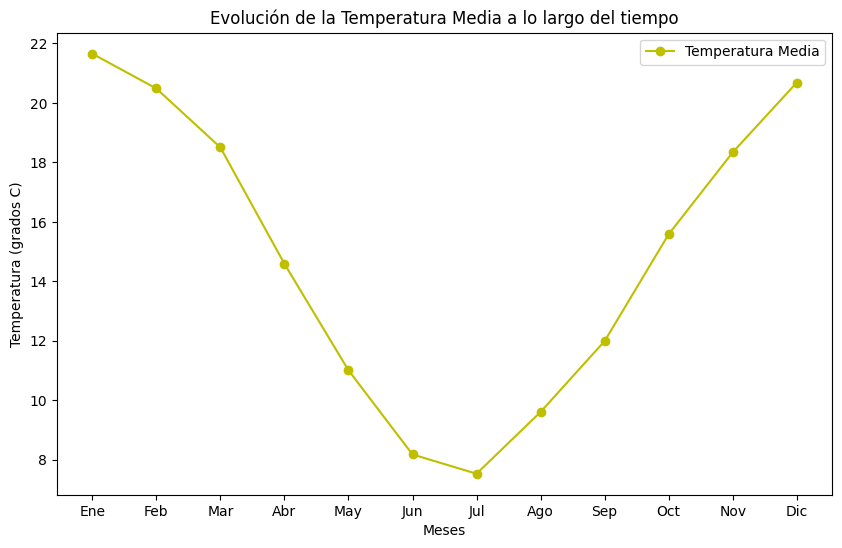

/tmp/ipykernel_566/2854360345.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variable2 = variable2.applymap(pd.to_numeric)


Temperatura mensual minima
Ene    15.683333
Feb    14.822222
Mar    13.237500
Abr     9.541667
May     6.115278
Jun     3.395833
Jul     2.418056
Ago     3.915278
Sep     6.018056
Oct     9.504167
Nov    12.158333
Dic    14.531944
dtype: float64


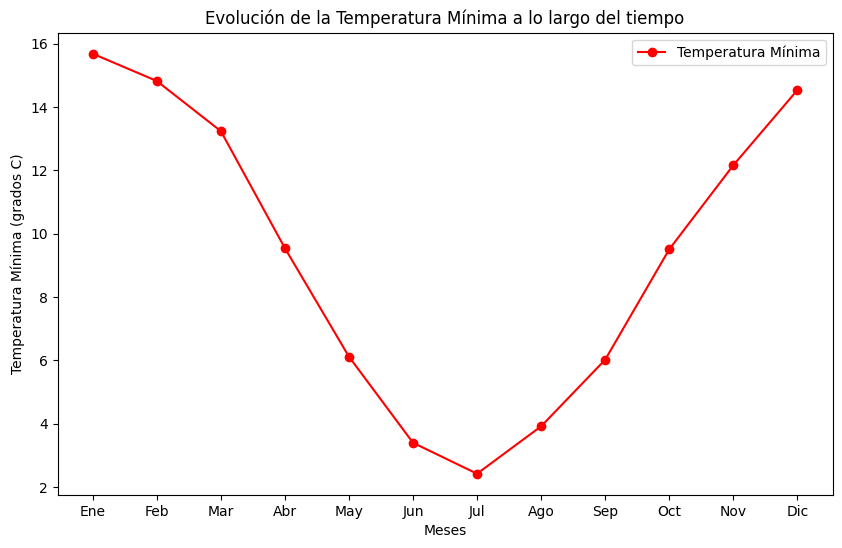

/tmp/ipykernel_566/2854360345.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variable2 = variable2.applymap(pd.to_numeric)


Temperatura mensual maxima
Ene    28.148649
Feb    26.936486
Mar    24.845946
Abr    20.905405
May    17.225676
Jun    14.277027
Jul    14.024324
Ago    16.575676
Sep    18.793243
Oct    22.208108
Nov    24.889189
Dic    27.172973
dtype: float64


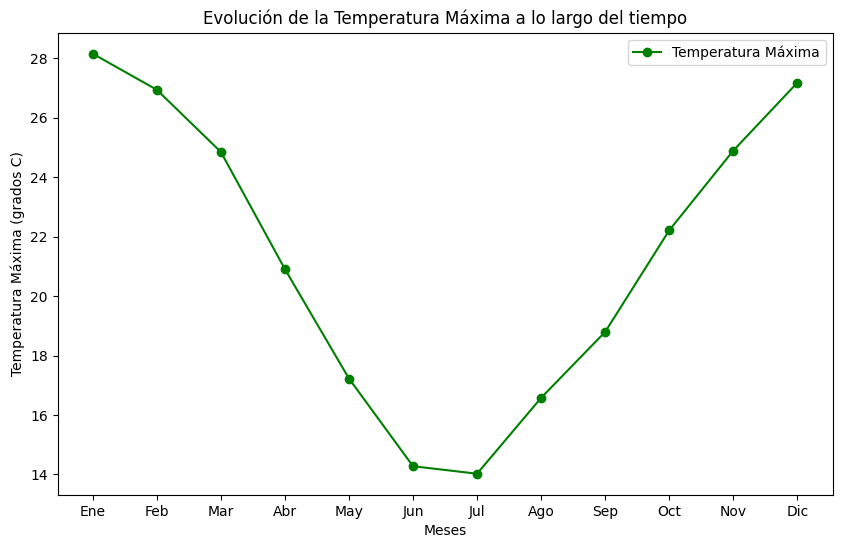

/tmp/ipykernel_566/2854360345.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variable2 = variable2.applymap(pd.to_numeric)


Nubosidad mensual
Ene    13.111111
Feb    12.395238
Mar    11.858730
Abr    11.355556
May    10.819048
Jun    11.061905
Jul    11.820635
Ago    12.944444
Sep    13.763492
Oct    15.088889
Nov    14.998413
Dic    14.198413
dtype: float64


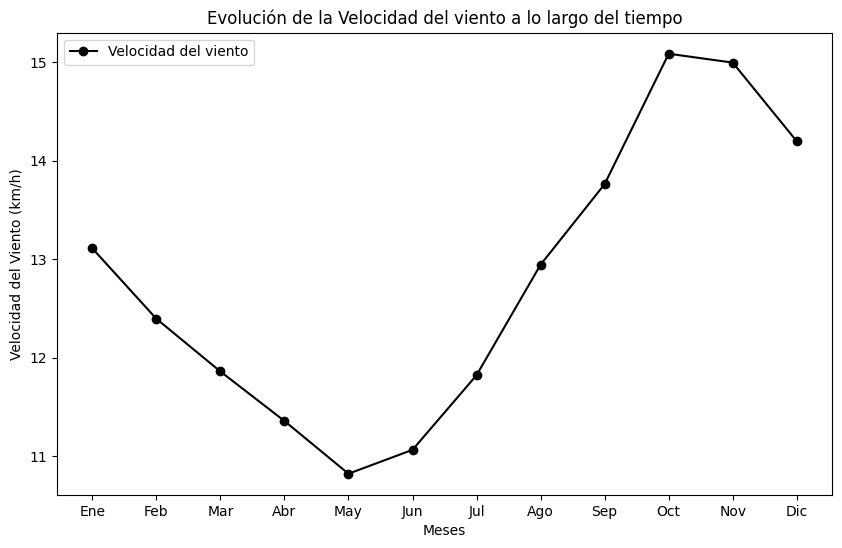

/tmp/ipykernel_566/2854360345.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  variable2 = variable2.applymap(pd.to_numeric)


Nubosidad total mensual
Ene    3.817808
Feb    3.771233
Mar    3.765753
Abr    3.861644
May    4.042466
Jun    4.206849
Jul    3.815068
Ago    3.689041
Sep    3.780822
Oct    3.847945
Nov    3.793151
Dic    3.804110
dtype: float64


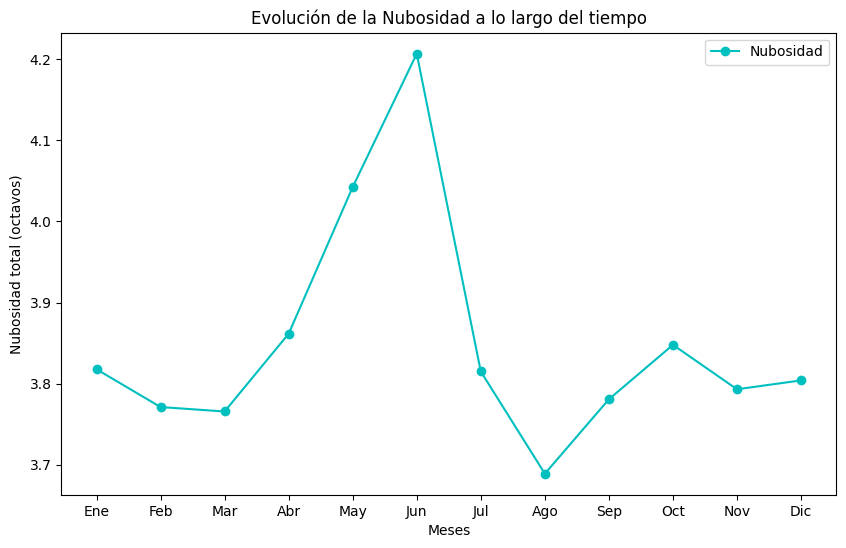

In [45]:
# Funciones
def Graficar(valor_medio:str,etiqueta:str,color_marcador:str,color:str,titulo:str,etiqueta_ejey:str):
    plt.figure(figsize=(10, 6))
    plt.plot(valor_medio.mean(axis=1), label=etiqueta, marker=color_marcador, color=color)
    plt.title(titulo)
    plt.xlabel('Meses')
    plt.ylabel(etiqueta_ejey)
    plt.legend()
    plt.show()

def Dataframes(comparador:str):
    variable1=df[df['Valor Medio de']==comparador]
    variable1= variable1.set_index('Estación')
    variable2 = variable1[variable1.columns[1:]].transpose()
    variable2 = variable2.applymap(pd.to_numeric)
    return variable1,variable2

# Temperatura media
df_temperatura,temp=Dataframes('Temperatura (grados C)')
print(f'Temperatura mensual \n{temp.mean(axis=1)}')
Graficar(temp,'Temperatura Media','o','y','Evolución de la Temperatura Media a lo largo del tiempo','Temperatura (grados C)')

'''df_temperatura=df[df['Valor Medio de']=='Temperatura mínima (grados C)']
df_temperatura= df_temperatura.set_index('Estación')

temp = df_temperatura[df_temperatura_min.columns[1:]].transpose()
temp = temp.applymap(pd.to_numeric)'''

# Temperatura minima
df_temperatura_min,temp_min=Dataframes('Temperatura mínima (grados C)')
print(f'Temperatura mensual minima\n{temp_min.mean(axis=1)}')
Graficar(temp_min,'Temperatura Mínima','o','r','Evolución de la Temperatura Mínima a lo largo del tiempo','Temperatura Mínima (grados C)')

'''df_temperatura_min=df[df['Valor Medio de']=='Temperatura mínima (grados C)']
df_temperatura_min= df_temperatura_min.set_index('Estación')

temp_min = df_temperatura_min[df_temperatura_min.columns[1:]].transpose()
temp_min = temp_min.applymap(pd.to_numeric)'''


# Temperatura maxima
'''df_temperatura_max=df[df['Valor Medio de']=='Temperatura máxima (grados C)']
df_temperatura_max= df_temperatura_max.set_index('Estación')

temp_max = df_temperatura_max[df_temperatura_max.columns[1:]].transpose()
temp_max = temp_max.applymap(pd.to_numeric)'''

df_temperatura_max,temp_max=Dataframes('Temperatura máxima (grados C)')
print(f'Temperatura mensual maxima\n{temp_max.mean(axis=1)}')
Graficar(temp_max,'Temperatura Máxima','o','g','Evolución de la Temperatura Máxima a lo largo del tiempo','Temperatura Máxima (grados C)')


# Velocidad del viento
'''df_velocidad_viento=df[df['Valor Medio de']=='Velocidad del Viento (km/h)']
df_velocidad_viento= df_velocidad_viento.set_index('Estación')

velocidad_viento = df_velocidad_viento[df_velocidad_viento.columns[1:]].transpose()
velocidad_viento = velocidad_viento.applymap(pd.to_numeric)'''

df_velocidad_viento,velocidad_viento=Dataframes('Velocidad del Viento (km/h)')
print(f'Nubosidad mensual\n{velocidad_viento.mean(axis=1)}')
Graficar(velocidad_viento,'Velocidad del viento','o','k','Evolución de la Velocidad del viento a lo largo del tiempo','Velocidad del Viento (km/h)')

# Nubosidad total
'''df_nubosidad=df[df['Valor Medio de']=='Nubosidad total (octavos)']
df_nubosidad= df_nubosidad.set_index('Estación')

nubosidad = df_nubosidad[df_nubosidad.columns[1:]].transpose()
nubosidad = nubosidad.applymap(pd.to_numeric)'''

df_nubosidad,nubosidad=Dataframes('Nubosidad total (octavos)')
print(f'Nubosidad total mensual\n{nubosidad.mean(axis=1)}')
Graficar(nubosidad,'Nubosidad','o','c','Evolución de la Nubosidad a lo largo del tiempo','Nubosidad total (octavos)')


## Preguntas de investigacion

1. Cual fue la estacion mas fria de todas?
2. En que estacion hubo mayores vientos?
3. En que mes hubo mas Nubosidad